In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
videos = pd.read_csv('C:\\Users\\deepak\\Downloads\\Youtube\\USvideos.csv')
videos_Category = pd.read_json('C:\\Users\\deepak\\Downloads\\Youtube\\US_category_id.json')

In [89]:
print(videos.shape)
print(videos.nunique())

(40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [90]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [91]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [92]:
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m').dt.date

In [93]:
publish_time = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos.insert(5, 'publish_date', publish_time.dt.date)
videos['publish_time'] = publish_time.dt.time
videos.insert(7, 'publish_hour', publish_time.dt.hour)

In [94]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,7,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,19,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,11,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,18,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [95]:
videos_Category.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [96]:
categories = {category['id']: category['snippet']['title'] for category in videos_Category['items']}

In [97]:
categories

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [98]:
videos.insert(4, 'category', videos['category_id'].astype(str).map(categories))

In [99]:
videos.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_date,publish_time,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13,17:13:01,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13,07:30:00,7,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12,19:05:24,19,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13,11:00:04,11,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12,18:01:41,18,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


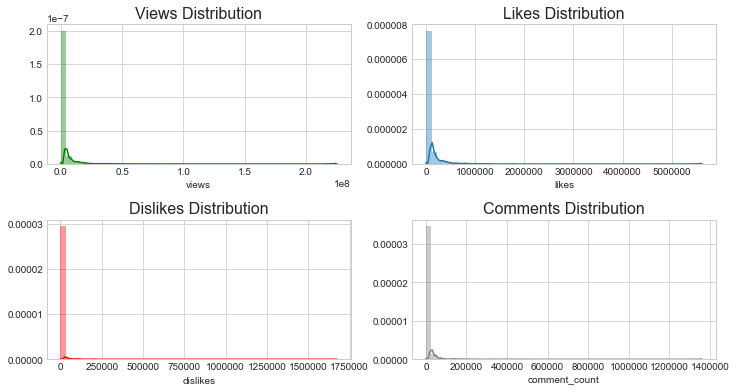

In [100]:
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(videos['views'], color = 'green')
g1.set_title("Views Distribution", fontsize=16)

plt.subplot(222)
g2 = sns.distplot(videos['likes'])
g2.set_title('Likes Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(videos['dislikes'], color='red')
g3.set_title("Dislikes Distribution", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(videos['comment_count'], color='grey')
g4.set_title("Comments Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

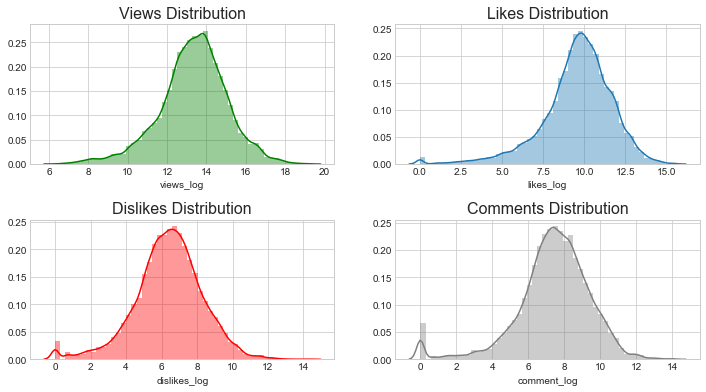

In [101]:
videos['views_log'] = np.log(videos['views'] + 1)
videos['likes_log'] = np.log(videos['likes'] + 1)
videos['dislikes_log'] = np.log(videos['dislikes'] + 1)
videos['comment_log'] = np.log(videos['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(videos['views_log'], color='green')
g1.set_title("Views Distribution", fontsize=16)

plt.subplot(222)
g2 = sns.distplot(videos['likes_log'])
g2.set_title('Likes Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(videos['dislikes_log'], color='red')
g3.set_title("Dislikes Distribution", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(videos['comment_log'], color='grey')
g4.set_title("Comments Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

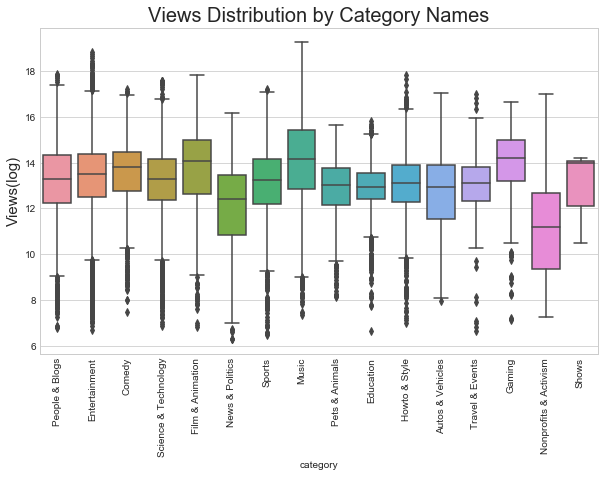

In [102]:
plt.figure(figsize = (10,6))
g1 = sns.boxplot(x='category', y='views_log', data=videos)
g1.set_title("Views Distribution by Category Names", fontsize=20)
g1.set_ylabel("Views(log)", fontsize=15)
plt.xticks(rotation=90)
plt.show()

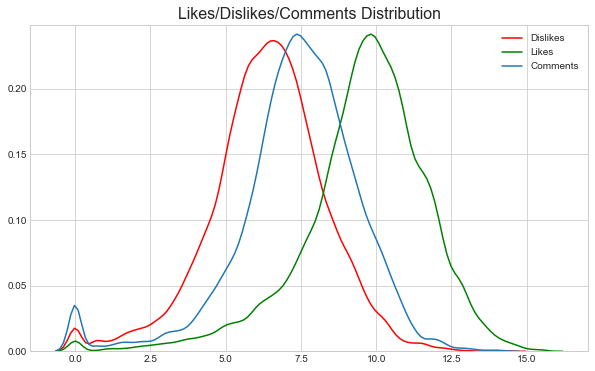

In [103]:
plt.figure(figsize = (10,6))

g1 = sns.distplot(videos['dislikes_log'], color='red',hist=False, label="Dislikes")
g1 = sns.distplot(videos['likes_log'], color='green',hist=False, label="Likes")
g1 = sns.distplot(videos['comment_log'],hist=False, label="Comments")
g1.set_title('Likes/Dislikes/Comments Distribution', fontsize=16)
plt.xlabel("")
plt.legend()
plt.show()

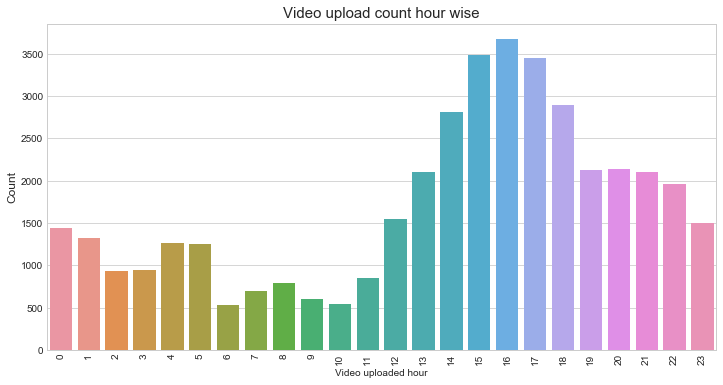

In [104]:
plt.figure(figsize = (12,6))
g = sns.countplot('publish_hour', data=videos)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Video upload count hour wise", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Video uploaded hour")
plt.show()

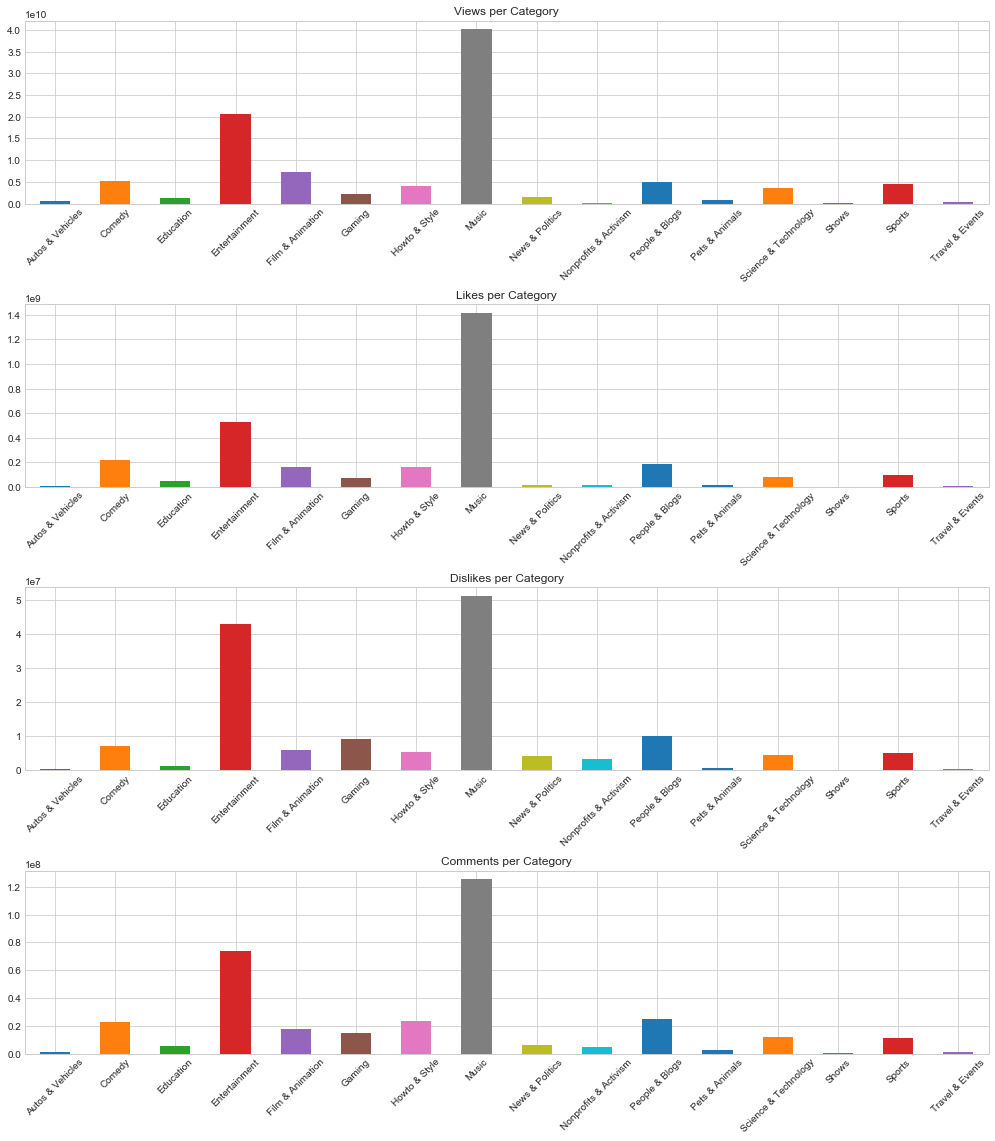

In [105]:
plt.figure(figsize = (38,19))

plt.subplot(421)
t1 = videos.groupby(['category'])['views'].sum()
t1.plot.bar()
plt.title("Views per Category")
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(423)
t2 = videos.groupby(['category'])['likes'].sum()
t2.plot.bar()
plt.title("Likes per Category")
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(425)
t3 = videos.groupby(['category'])['dislikes'].sum()
t3.plot.bar()
plt.title("Dislikes per Category")
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(427)
t3 = videos.groupby(['category'])['comment_count'].sum()
t3.plot.bar()
plt.title("Comments per Category")
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplots_adjust(wspace = 0.2, hspace = .55)
plt.show()

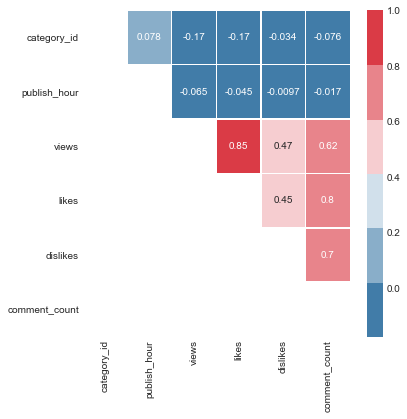

In [106]:
colormap = sns.diverging_palette(240, 10, n=6)
plt.subplots(figsize=(6,6))
mask = np.tri((videos[['category_id', 'publish_hour', 'views', 'likes', 'dislikes', 'comment_count']].corr()).shape[0], k=0) #Masking the lower triangle
sns.heatmap(videos[['category_id', 'publish_hour', 'views', 'likes', 'dislikes', 'comment_count']].corr(), cmap=colormap, annot=True, linewidths=.5, mask=mask) 
plt.show()

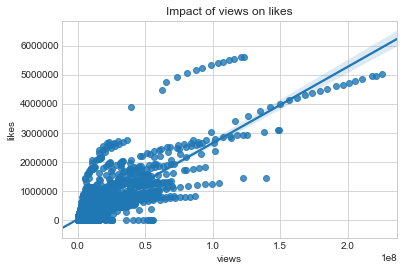

In [107]:
sns.regplot(videos['views'], videos['likes'])
plt.title('Impact of views on likes')
plt.show()

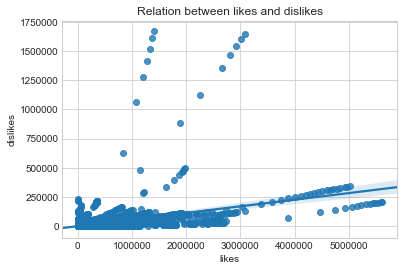

In [108]:
sns.regplot(videos['likes'], videos['dislikes'])
plt.title('Relation between likes and dislikes')
plt.show()

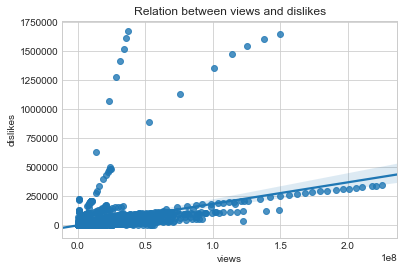

In [109]:
sns.regplot(videos['views'], videos['dislikes'])
plt.title('Relation between views and dislikes')
plt.show()

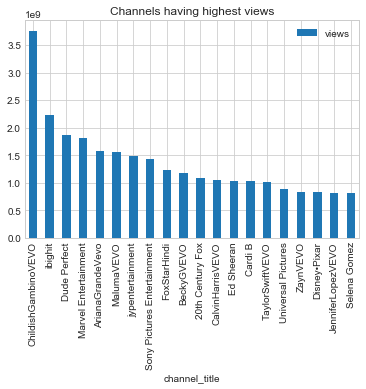

In [110]:
data = videos.groupby(['channel_title'])['views'].agg({'views': 'sum'}).sort_values("views", ascending=False).head(20)
data.plot.bar()
plt.title("Channels having highest views")
plt.show()

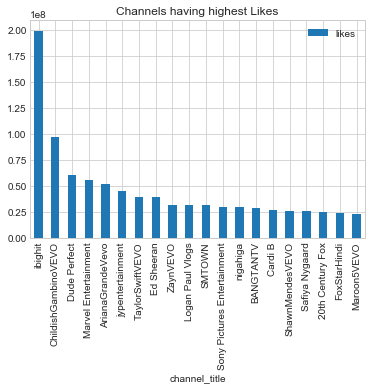

In [111]:
data1 = videos.groupby(['channel_title'])['likes'].agg({'likes': 'sum'}).sort_values("likes", ascending=False).head(20)
data1.plot.bar()
plt.title("Channels having highest Likes")
plt.show()

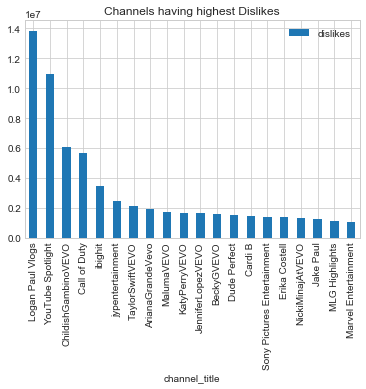

In [112]:
data2 = videos.groupby(['channel_title'])['dislikes'].agg({'dislikes': 'sum'}).sort_values("dislikes", ascending=False).head(20)
data2.plot.bar()
plt.title("Channels having highest Dislikes")
plt.show()

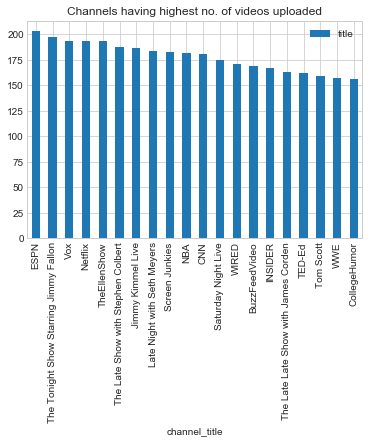

In [113]:
data3 = videos.groupby(['channel_title'])['title'].agg({'title': 'count'}).sort_values("title", ascending=False).head(20)
data3.plot.bar()
plt.title("Channels having highest no. of videos uploaded")
plt.show()

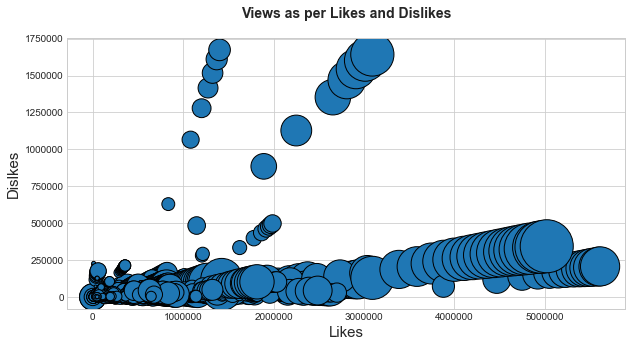

In [114]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.title('Views as per Likes and Dislikes', fontsize=14, fontweight='bold', y=1.05)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislkes', fontsize=15)

likes = videos["likes"].values
dislikes = videos["dislikes"].values
views = videos["views"].values

plt.scatter(likes, dislikes, s = views/80000, edgecolors='black')
plt.show()

In [115]:
#Fetching records with highest likes and dislikes
print(videos.loc[videos['likes'].idxmax()])

video_id                                                        7C2z4GqqS5E
trending_date                                                    2018-06-01
title                                   BTS (방탄소년단) 'FAKE LOVE' Official MV
channel_title                                                       ibighit
category                                                              Music
category_id                                                              10
publish_date                                                     2018-05-18
publish_time                                                       09:00:02
publish_hour                                                              9
tags                      BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...
views                                                             123010920
likes                                                               5613827
dislikes                                                             206892
comment_coun

In [116]:
print(videos.loc[videos['dislikes'].idxmax()])

video_id                                                        QwZT7T-TXT0
trending_date                                                    2018-01-09
title                                                             So Sorry.
channel_title                                              Logan Paul Vlogs
category                                                      Entertainment
category_id                                                              24
publish_date                                                     2018-01-02
publish_time                                                       16:42:21
publish_hour                                                             16
tags                      logan paul vlog|"logan paul"|"logan"|"paul"|"o...
views                                                              37539570
likes                                                               1402578
dislikes                                                            1674420
comment_coun

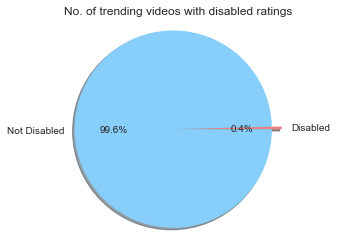

In [117]:
value_counts = videos["ratings_disabled"].value_counts().to_dict()
disabled = value_counts[True]
notDisabled = value_counts[False]
ratings = []
ratings.append(disabled)
ratings.append(notDisabled)
labels = ['Disabled', 'Not Disabled']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) #to pop out one element out of 2
plt.pie(ratings, colors = colors, labels = labels, shadow=True, explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.title('No. of trending videos with disabled ratings')
plt.show()

In [118]:
videos['title_len'] = videos['title'].str.len()

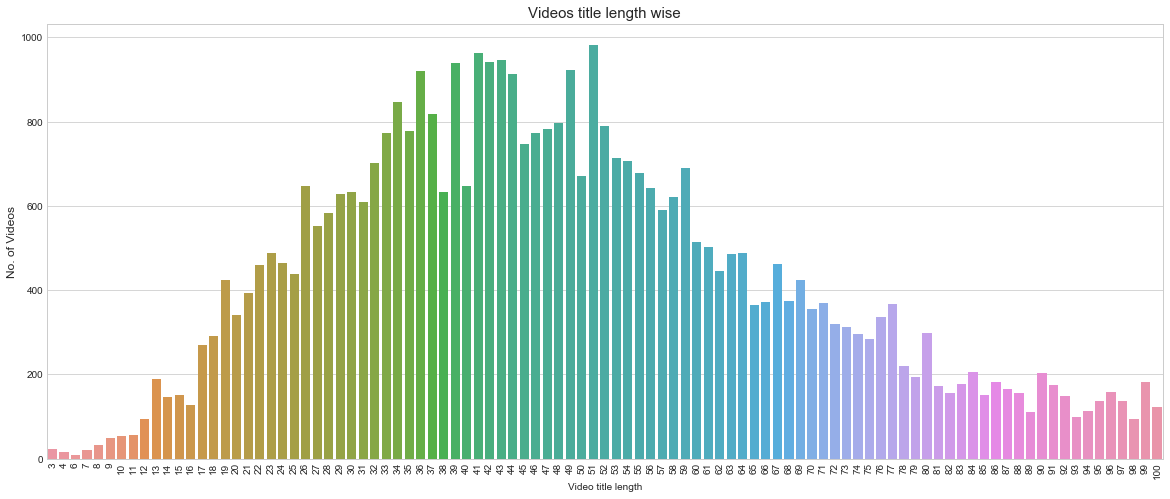

In [119]:
plt.figure(figsize = (20,8))
g = sns.countplot('title_len', data=videos)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Videos title length wise", fontsize=15)
g.set_ylabel("No. of Videos", fontsize=12)
g.set_xlabel("Video title length")
plt.show()

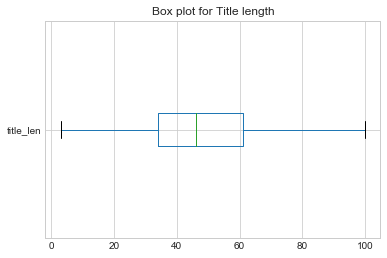

In [120]:
videos['title_len'].plot(kind = "box", vert=False)
plt.title('Box plot for Title length')
plt.show()

Inferences:
    
1) Views, likes, dislikes and Comments are normally distributed

2) Overall Music videos are more likely to be seen than other video category

3) 'Non Profits and Activism' category is less likely to be seen by viewers in US

4) Best time to publish the video is between 3 and 5 PM

5) Views and likes are positively correlated

6) There are very less no. of trending videos whose ratings are disabled

7) On an avg, the video title length is between 50 to 90 and 60